In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
df = pd.read_csv('cryinglaughing_features.csv')


In [20]:
print("Jumlah Data:", len(df))
print("\n5 Data Pertama:")
display(df.head())

Jumlah Data: 40

5 Data Pertama:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,label
0,-2310.7358,168.961550,89.736310,62.125824,24.097116,-20.319550,-19.241568,5.522614,-21.432621,9.865933,13.760837,42.690937,34.236862,36.093460,-0.830130,1.041367,crying
1,-2122.7788,-1.604806,121.856050,35.709984,-44.236240,63.252728,-29.746082,84.843216,-12.022893,28.858930,-29.235443,17.402885,-24.137320,35.699577,-22.581816,-5.880320,crying
2,-2148.0088,82.941330,29.690516,-30.795494,93.242230,58.931587,-8.009898,45.796726,-18.018501,77.695015,-29.004654,1.607312,-28.199972,18.190794,-58.247850,12.012989,crying
3,-2233.3323,135.504600,109.808840,-43.869312,-81.135260,35.676495,-58.260704,29.546520,-9.723966,28.376953,16.102468,13.290146,-37.431470,-34.111286,-37.486500,-10.502954,crying
4,-2217.2136,291.981570,101.133630,-11.324380,21.937824,49.268127,16.706978,-5.616988,-29.366375,23.783356,35.872290,28.204603,-29.148338,-24.805496,-26.857000,-12.117413,crying


In [21]:
print("\nDistribusi Kelas:")
print(df['label'].value_counts())


Distribusi Kelas:
crying      20
laughing    20
Name: label, dtype: int64


In [31]:
X = df.drop('label', axis=1)
y = df['label']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return accuracy_score(y_test, y_pred)



Evaluasi untuk Metrik EUCLIDEAN


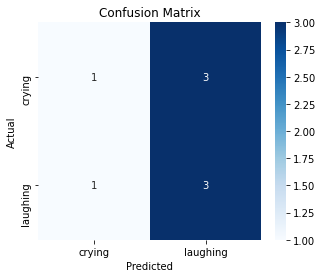


Classification Report:
              precision    recall  f1-score   support

      crying       0.50      0.25      0.33         4
    laughing       0.50      0.75      0.60         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8


Evaluasi untuk Metrik MANHATTAN


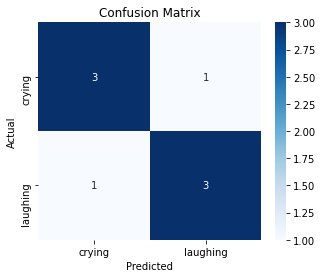


Classification Report:
              precision    recall  f1-score   support

      crying       0.75      0.75      0.75         4
    laughing       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8


Evaluasi untuk Metrik CHEBYSHEV


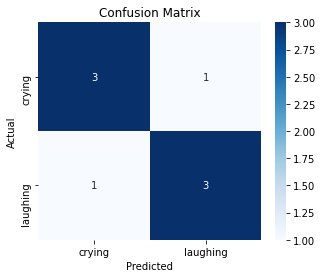


Classification Report:
              precision    recall  f1-score   support

      crying       0.75      0.75      0.75         4
    laughing       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



In [35]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
results = {}

for metric in metrics:
    print(f"\n{'='*40}")
    print(f"Evaluasi untuk Metrik {metric.upper()}")
    print(f"{'='*40}")
    
    # Membuat dan melatih model
    knn = KNeighborsClassifier(
        n_neighbors=3,
        metric=metric
    )
    knn.fit(X_train_scaled, y_train)
    
    # Evaluasi model
    acc = evaluate_model(knn, X_test_scaled, y_test)
    results[metric] = acc

In [36]:
print("\nPerbandingan Akurasi Akhir:")
for metric, accuracy in results.items():
    print(f"{metric.upper():<10}: {accuracy:.2%}")


Perbandingan Akurasi Akhir:
EUCLIDEAN : 50.00%
MANHATTAN : 75.00%
CHEBYSHEV : 75.00%
